## Centrality measures

Centrality measures can be used to predict (positive or negative) outcomes for a node.
Your task in this week’s assignment is to identify an interesting set of network data that is available on the web
(either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes.

As an additional constraint, there should be at least one categorical variable available for each node
(such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.)

In addition to identifying your data source, you should create a high level plan that describes how you would load the data for analysis,
and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups.
For this week’s assignment, you are not required to actually load or analyze the data.  Please see also Project 1 below.
You may work in a small group on the assignment.   You should post your document to GitHub by end of day on Sunday.

In [22]:
import yfinance as yf
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Dow Jones Industrial Average Equity Index

We begin by scrapping the data from Dow Jones using the Yahoo Finance API
We proceed to create a ticker object that allows access to the Dow Jones  Companies
To begin our analysis we start with only apple and MSFT to have a sense of the data

In [11]:
var1 = yf.Ticker('AAPL')
var2 = yf.Ticker('MSFT')

After we create the the first variable wich is a ticker object we can use it to access data inside APPL stock like the institutional holders

In [12]:
apple = var1.institutional_holders
msft = var2.institutional_holders

In [13]:
# Take a look at df for apple
apple

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1261261357,2021-12-30,0.0773,223962179162
1,Blackrock Inc.,1019810291,2021-12-30,0.0625,181087713372
2,"Berkshire Hathaway, Inc",887135554,2021-12-30,0.0544,157528660323
3,State Street Corporation,633115246,2021-12-30,0.0388,112422274232
4,"FMR, LLC",352204129,2021-12-30,0.0216,62540887186
5,"Geode Capital Management, LLC",264351901,2021-12-30,0.0162,46940967060
6,Price (T.Rowe) Associates Inc,223148792,2021-12-30,0.0137,39624530995
7,Northern Trust Corporation,190876014,2021-12-30,0.0117,33893853805
8,Norges Bank Investment Management,167580974,2020-12-30,0.0103,22236319440
9,Bank Of New York Mellon Corporation,144695935,2021-12-30,0.0089,25693657177


We want to add a column to this data frame that contains the ticker symbol of Apple - we use this method to create a mapping back to Apple and the rest of the
Companies we will be analyzing shortly. Also the prompt requested to include categorical data to our analysis

In [15]:
apple['comp'] = var1.ticker
msft['comp'] = var2.ticker

In [16]:
apple

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",1261261357,2021-12-30,0.0773,223962179162,AAPL
1,Blackrock Inc.,1019810291,2021-12-30,0.0625,181087713372,AAPL
2,"Berkshire Hathaway, Inc",887135554,2021-12-30,0.0544,157528660323,AAPL
3,State Street Corporation,633115246,2021-12-30,0.0388,112422274232,AAPL
4,"FMR, LLC",352204129,2021-12-30,0.0216,62540887186,AAPL
5,"Geode Capital Management, LLC",264351901,2021-12-30,0.0162,46940967060,AAPL
6,Price (T.Rowe) Associates Inc,223148792,2021-12-30,0.0137,39624530995,AAPL
7,Northern Trust Corporation,190876014,2021-12-30,0.0117,33893853805,AAPL
8,Norges Bank Investment Management,167580974,2020-12-30,0.0103,22236319440,AAPL
9,Bank Of New York Mellon Corporation,144695935,2021-12-30,0.0089,25693657177,AAPL


## Subset data Analysis

In addition to identifying your data source, you should create a high level plan that describes how you would load the data for analysis,
and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups.



In [44]:
tog_ = pd.concat([apple, msft])
# using networkx to draw
G2 = nx.from_pandas_edgelist(tog_, 'Holder', 'comp', edge_attr=True)

### Edge Attribure = True
add the edge_attr = True to be able to see the values corresponding to the edges

In [46]:
edgelist = nx.to_edgelist(G2)

In [50]:
[v[2]['Value'] /50_000_000_000 for v in edgelist]


[4.47924358324,
 4.14312649702,
 3.62175426744,
 3.15057320646,
 2.24844548464,
 1.25081774372,
 0.9388193412,
 0.7924906199,
 0.6778770761,
 0.4447263888,
 0.51387314354,
 3.49124128852,
 2.03501762764,
 1.44871342004,
 0.8684261185,
 1.37351003488,
 0.59468774366,
 0.72455298974,
 0.6246685394,
 0.6120050757]

### Change Node color
First we begin our analysis we change the colors of the nodes to understand who are the companies (Blue) and who are the institutional holders (orange)

In [27]:
colors = []
for node in G2:
    if node in tog_['comp'].values:
        colors.append("blue")
    else:
        colors.append("orange")

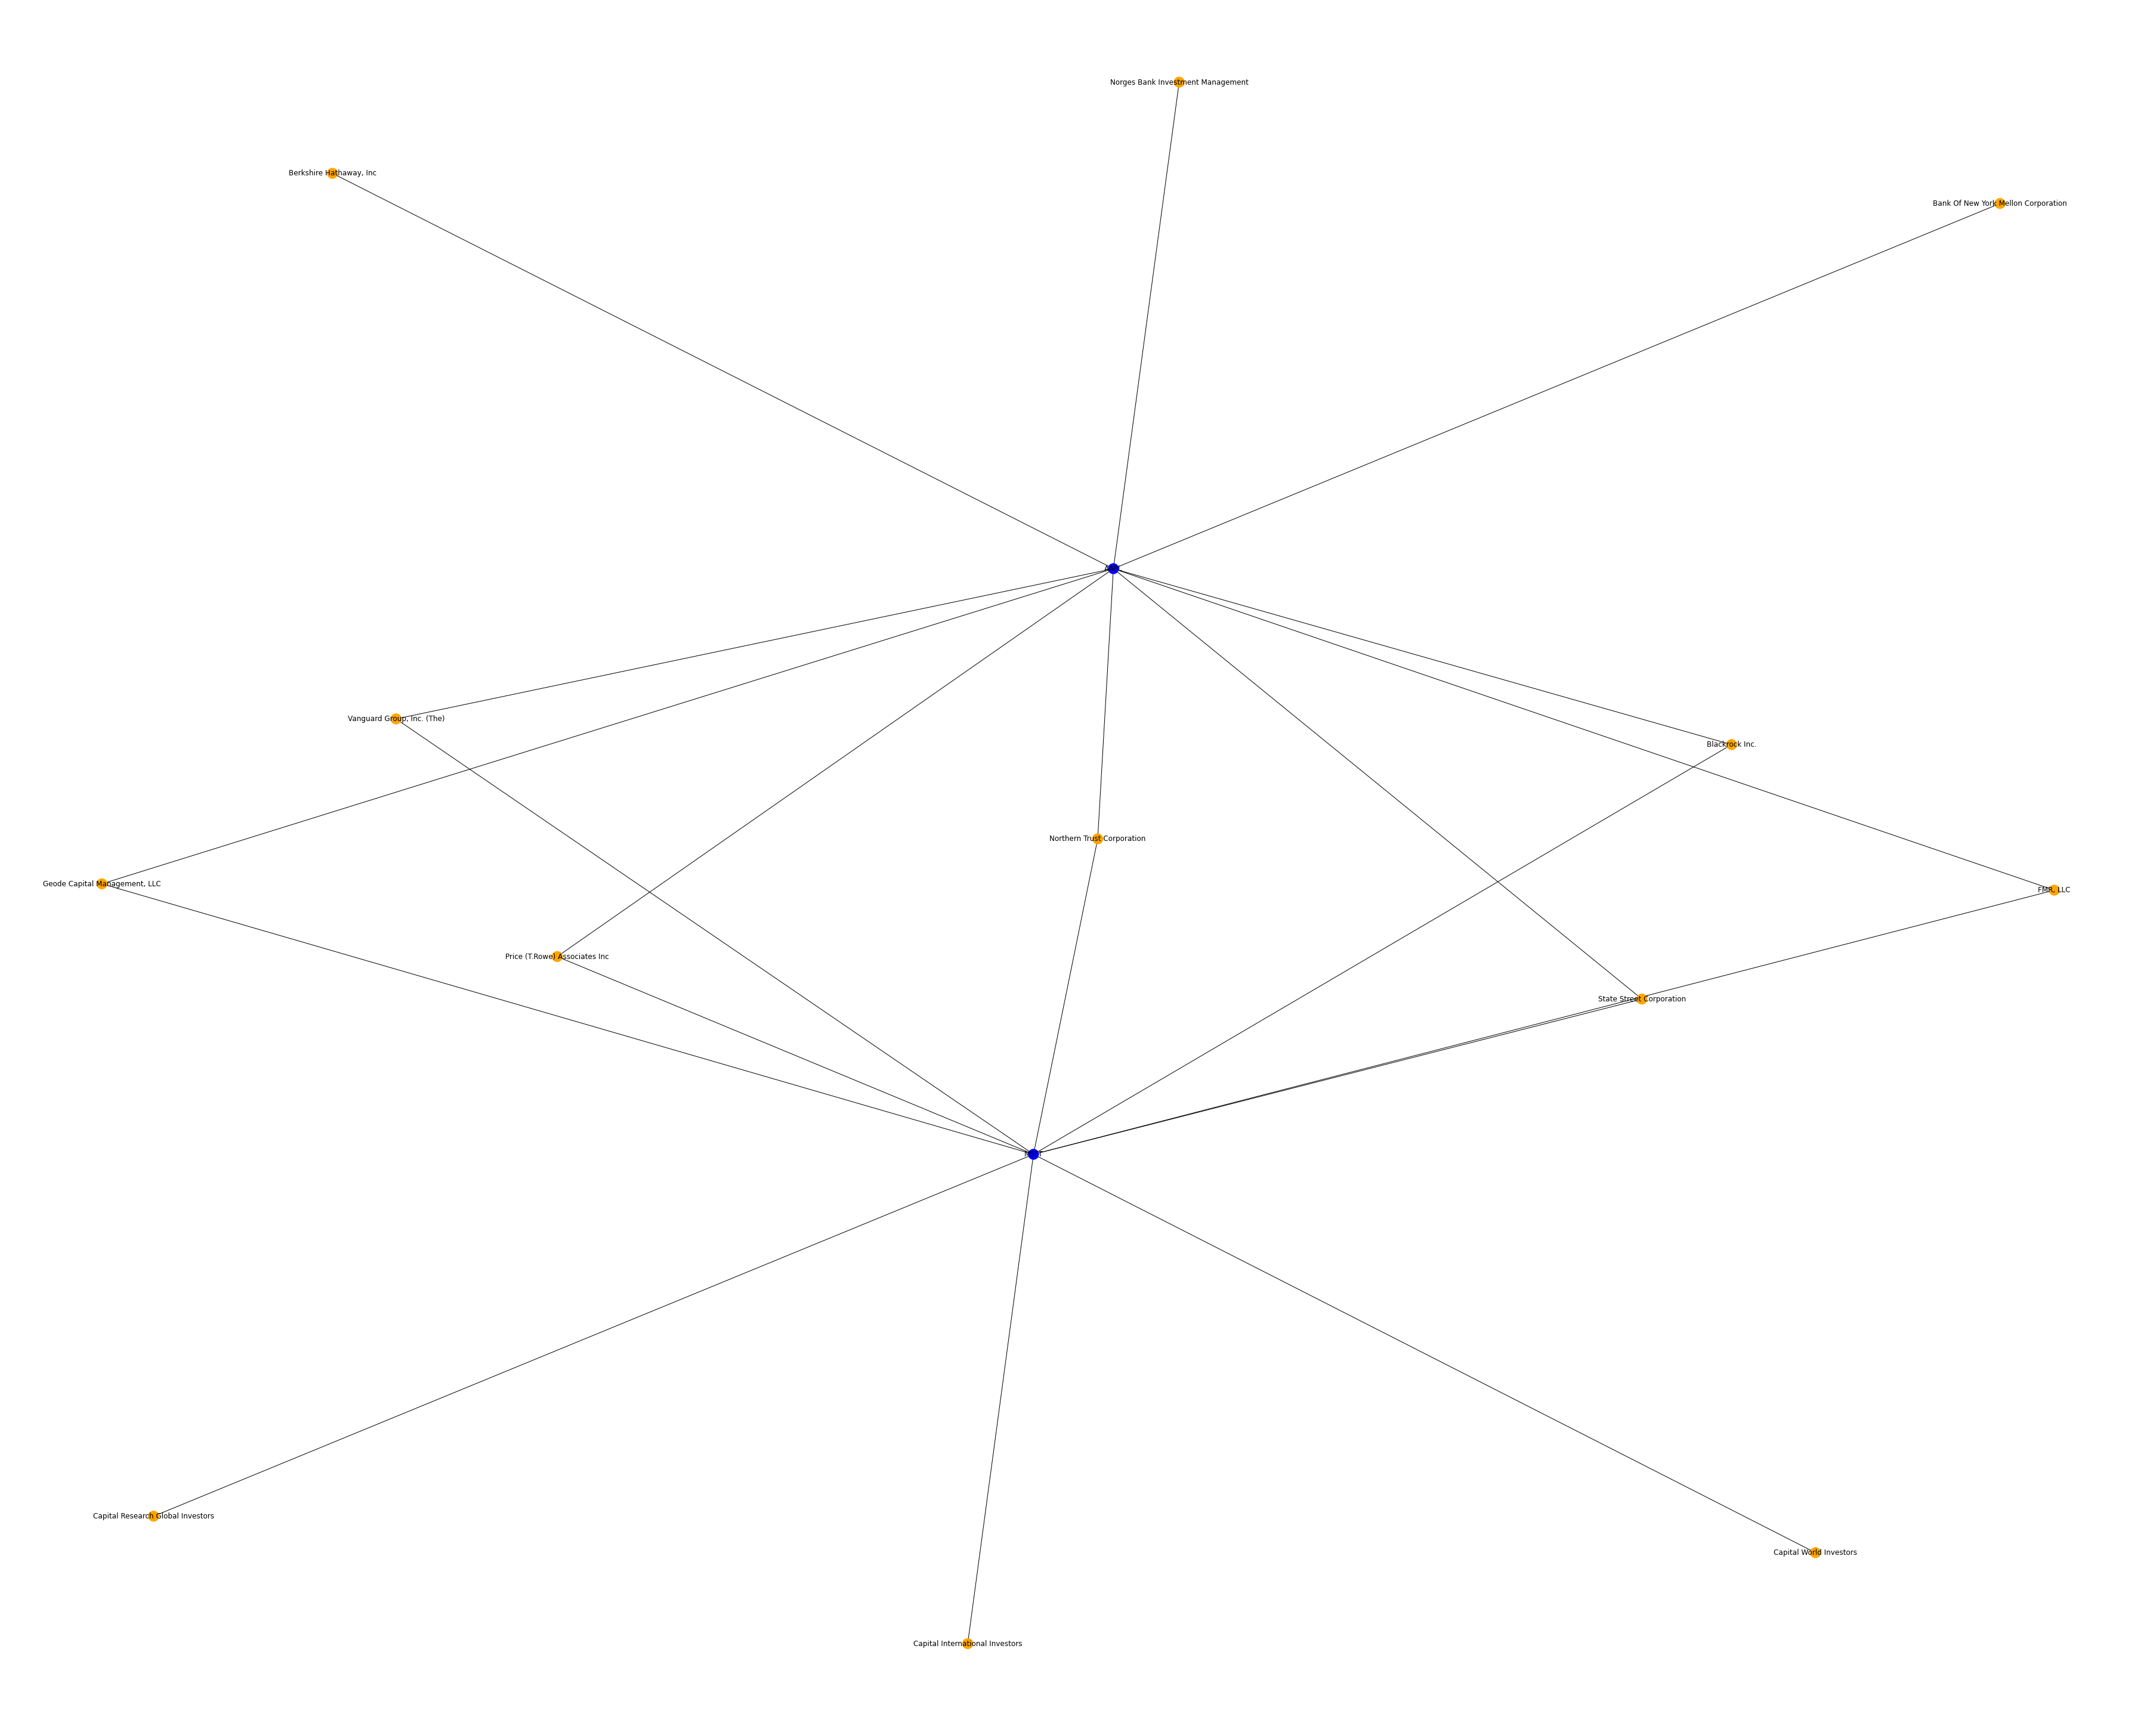

In [29]:
plt.figure(figsize=(50,40))
nx.draw(G2, with_labels=True,
        node_color=colors)

## Degree Centrality Plan
once we have loaded only two companies (subset of data) we will create a strategy to analyze Degree centrality

### Diameter, Nodes, Edges,


In [19]:
diam = nx.diameter(G2)
diam

4

### Node Size
The degree is the number of relationships of the particular node
We need to transform the degree into a dictionary
In order to appreciate the size of each node we need to use a list comprehension to multiply the value in the dict


In [31]:
dict(G2.degree())

{'Vanguard Group, Inc. (The)': 2,
 'AAPL': 10,
 'Blackrock Inc.': 2,
 'Berkshire Hathaway, Inc': 1,
 'State Street Corporation': 2,
 'FMR, LLC': 2,
 'Geode Capital Management, LLC': 2,
 'Price (T.Rowe) Associates Inc': 2,
 'Northern Trust Corporation': 2,
 'Norges Bank Investment Management': 1,
 'Bank Of New York Mellon Corporation': 1,
 'MSFT': 10,
 'Capital World Investors': 1,
 'Capital Research Global Investors': 1,
 'Capital International Investors': 1}

In [32]:
# We have succesfully enlarge the nodes to have better understading of their degree
[v * 100 for v in dict(G2.degree()).values()]

[200, 1000, 200, 100, 200, 200, 200, 200, 200, 100, 100, 1000, 100, 100, 100]

## Draw function

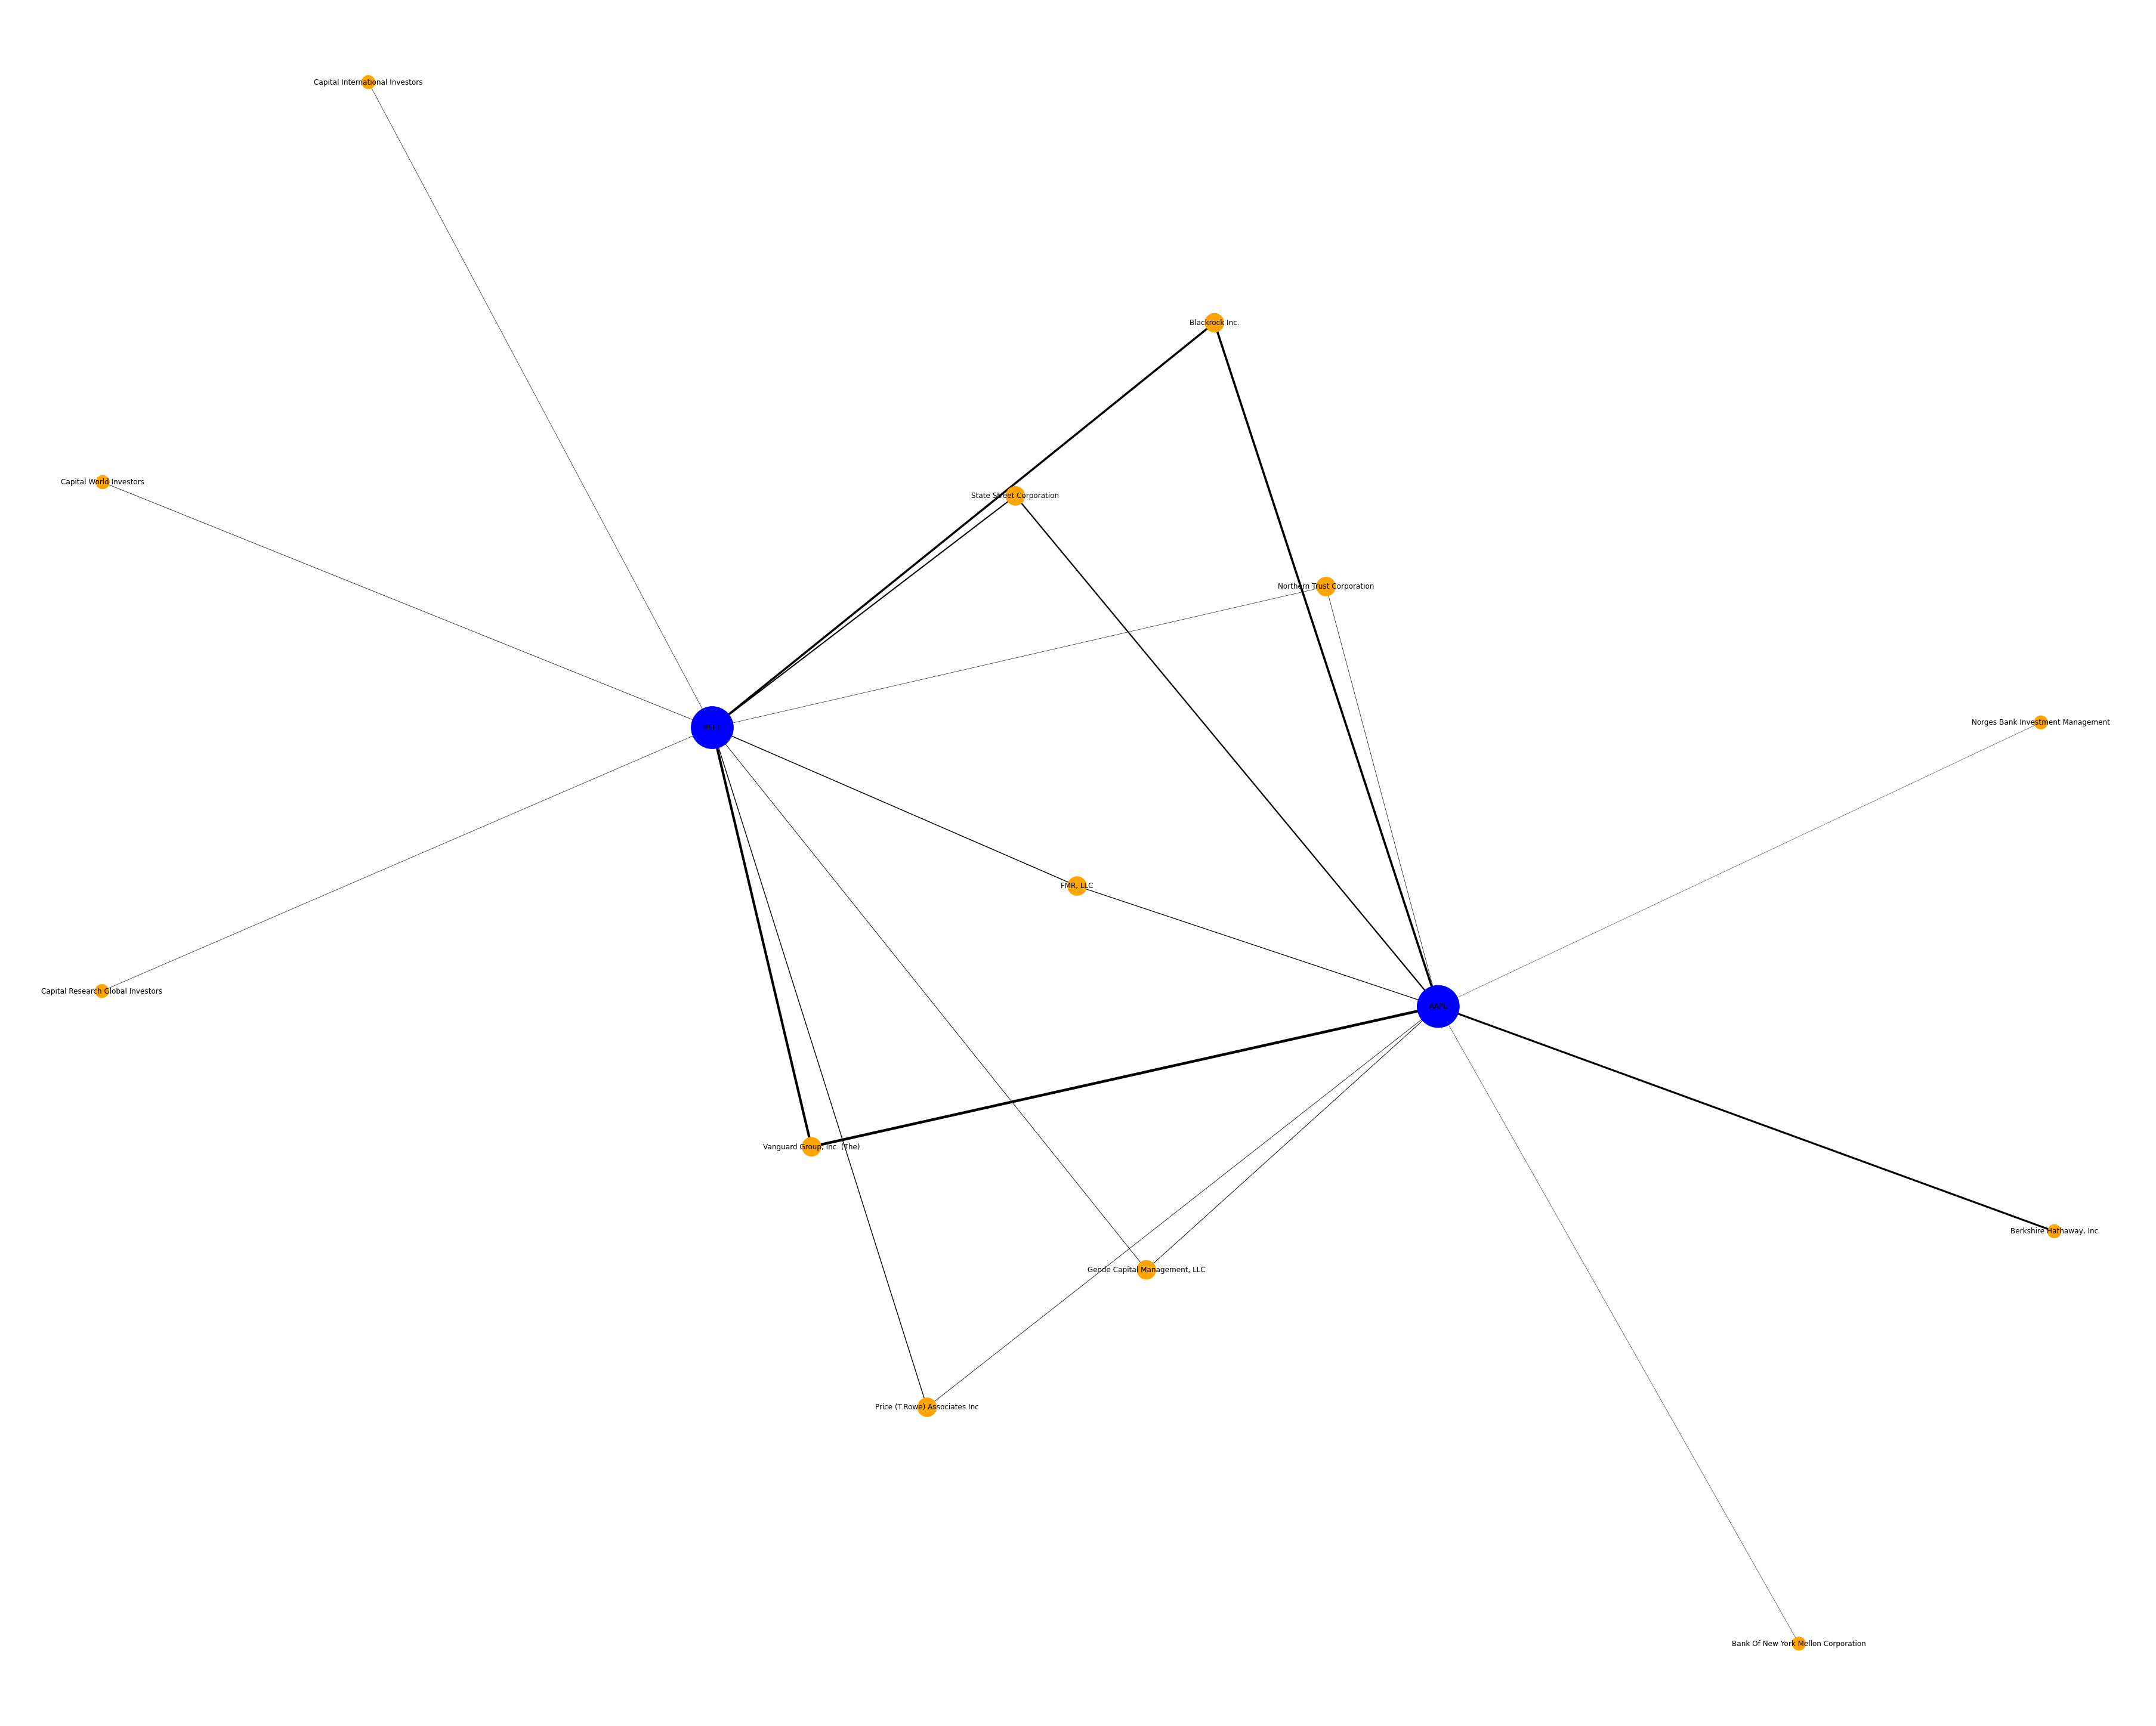

In [51]:
plt.figure(figsize=(50,40))
nx.draw(G2, with_labels=True,
        node_color=colors,
        node_size = [v * 500 for v in dict(G2.degree()).values()],
                     width= [v[2]['Value'] /50_000_000_000 for v in edgelist])

### Number of Neighbors
Compute degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph.

In [36]:
degrees = [len(list(G2.neighbors(n))) for n in G2.nodes]
degrees

[2, 10, 2, 1, 2, 2, 2, 2, 2, 1, 1, 10, 1, 1, 1]

## All ticker symbols - DOW Jones

![](images/wiki_table.PNG)


In [4]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

For this Particular analysis we are only interested in the symbol

In [5]:
tickers

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.02%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.60%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.25%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.96%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,3.74%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.53%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.03%
8,Coca-Cola,NYSE,KO,Soft Drink,1987-03-12,Also 1932-05-26 to 1935-11-20,1.15%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,2.65%


##